## Global Shark Attacks

In [2]:
import pandas as pd
import numpy as np
import csv
import pylab as plt
import seaborn as sns
import regex as re
%matplotlib inline
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [3]:
URL= r'C:\Users\carol\Ironhack\Proyecto-1\data\attacks.csv'

In [4]:
ataques_original=pd.read_csv(URL, encoding='latin1')

In [5]:
ataques= ataques_original.copy()
ataques.head().T

,0,1,2,3,4
Case Number,2018.06.25,2018.06.18,2018.06.09,2018.06.08,2018.06.04
Date,25-Jun-2018,18-Jun-2018,09-Jun-2018,08-Jun-2018,04-Jun-2018
Year,2018.0,2018.0,2018.0,2018.0,2018.0
Type,Boating,Unprovoked,Invalid,Unprovoked,Provoked
Country,USA,USA,USA,AUSTRALIA,MEXICO
Area,California,Georgia,Hawaii,New South Wales,Colima
Location,"Oceanside, San Diego County","St. Simon Island, Glynn County","Habush, Oahu",Arrawarra Headland,La Ticla
Activity,Paddling,Standing,Surfing,Surfing,Free diving
Name,Julie Wolfe,Adyson McNeely,John Denges,male,Gustavo Ramos
Sex,F,F,M,M,M


In [6]:
ataques.shape

(25723, 24)

In [7]:
ataques.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
ataques.columns=[a.lower().replace(' ', '_') for a in ataques]
ataques.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [9]:
ataques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null 

In [10]:
ataques.dtypes

case_number                object
date                       object
year                      float64
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex_                       object
age                        object
injury                     object
fatal_(y/n)                object
time                       object
species_                   object
investigator_or_source     object
pdf                        object
href_formula               object
href                       object
case_number.1              object
case_number.2              object
original_order            float64
unnamed:_22                object
unnamed:_23                object
dtype: object

In [11]:
def check_nan(df: pd.DataFrame) -> None: #ahora me creo una fucnión para que me entre todo. Lo que digo es que entre un DataFrame no hace falta print. Asi no lo sobrescribo
    
    """
    Recibe un dataframe y enseña el % de valores nulos
    y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # porcentaje de nulo en cada columna
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    
    # grafico de nulos en el dataframe
    #inicializa figura y establece un tamaño
    plt.figure(figsize=(10, 6)) # 100x60 pixeles

    sns.heatmap(df.isna(),          # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='YlOrRd',     # mapa de color
                cbar=False,         # sin barra lateral
               )

plt.show();

'N nan cols: 24'

case_number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex_                      77.697003
age                       86.506240
injury                    75.609377
fatal_(y/n)               77.595926
time                      88.539439
species_                  86.533453
investigator_or_source    75.566614
pdf                       75.500525
href_formula              75.504412
href                      75.500525
case_number.1             75.500525
case_number.2             75.500525
original_order            75.473312
unnamed:_22               99.996112
unnamed:_23               99.992225
dtype: float64

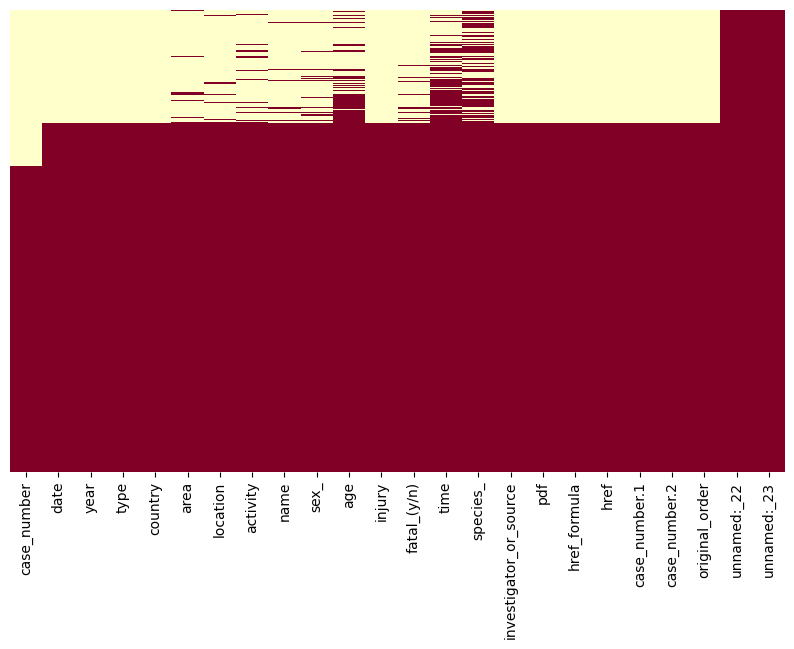

In [12]:
check_nan(ataques)

In [13]:
ataques.duplicated().any()

True

In [14]:
#identifico cuáles son esas filas duplicadas
duplicados=ataques.duplicated()
filas_duplicadas=ataques[duplicados]

In [15]:
ataques = ataques.drop(filas_duplicadas.index)

In [16]:
ataques_original.shape, ataques.shape

((25723, 24), (6312, 24))

In [17]:
#filtro las filas con valores nulos
filas_null=ataques.isna().all(axis=1)
filas_null=ataques[filas_null]

In [18]:
cantidad_filas_nulls=filas_null.sum()
cantidad_filas_nulls

case_number                 0
date                        0
year                      0.0
type                        0
country                     0
area                        0
location                    0
activity                    0
name                        0
sex_                        0
age                         0
injury                      0
fatal_(y/n)                 0
time                        0
species_                    0
investigator_or_source      0
pdf                         0
href_formula                0
href                        0
case_number.1               0
case_number.2               0
original_order            0.0
unnamed:_22                 0
unnamed:_23                 0
dtype: object

In [19]:
ataques[filas_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             0 non-null      object 
 1   date                    0 non-null      object 
 2   year                    0 non-null      float64
 3   type                    0 non-null      object 
 4   country                 0 non-null      object 
 5   area                    0 non-null      object 
 6   location                0 non-null      object 
 7   activity                0 non-null      object 
 8   name                    0 non-null      object 
 9   sex_                    0 non-null      object 
 10  age                     0 non-null      object 
 11  injury                  0 non-null      object 
 12  fatal_(y/n)             0 non-null      object 
 13  time                    0 non-null      object 
 14  species_                0 non-null     

In [20]:
ataques = ataques.drop(filas_null.index)

In [21]:
ataques_original.shape, ataques.shape

((25723, 24), (6311, 24))

## Columna 'case_number'

In [22]:
ataques['case_number'].value_counts().head()

0               8
1920.00.00.b    2
1966.12.26      2
2014.08.02      2
1990.05.10      2
Name: case_number, dtype: int64

In [23]:
ataques['case_number'].isnull().sum() 

1

In [24]:
ataques['case_number'].fillna('desconocido', inplace=True)

## Columna 'date'

In [25]:
ataques['date'].value_counts().head()

1957    11
1942     9
1956     8
1958     7
1950     7
Name: date, dtype: int64

In [26]:
ataques['date'].isnull().sum()

9

In [27]:
ataques['date'].fillna('desconocido', inplace=True)

## Columna 'year'

In [28]:
ataques['year'].value_counts().head()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
Name: year, dtype: int64

In [29]:
ataques['year'].isnull().sum()

11

In [30]:
ataques['year'].fillna('desconocido', inplace=True)

## Columna 'type'

In [31]:
ataques['type'].isnull().sum()

13

In [32]:
ataques['type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

Eliminar 'Invalid' y 'Questionable' de 'type' es una buena opción porque estos valores son ambiguos y no aportan información útil para el análisis de tipos de ataques de tiburones.

In [33]:
ataques = ataques[~ataques['type'].isin(['Invalid', 'Questionable'])]


Buena idea comparar los valores nulos en la columna "type" con otras columnas para obtener una mejor comprensión de cómo llenar esos valores nulos. Algunas columnas que podrían proporcionar información útil incluyen "activity" y "species_"

In [34]:
# Seleccionar las filas nulas en la columna 'type' y las columnas 'activity' y 'species'
null_type_rows=ataques.loc[ataques['type'].isnull(),['activity','species_', 'type']]
null_type_rows

,activity,species_,type
85,Fishing,NaN,NaN
382,Surfing,NaN,NaN
4867,Wreck of a sampam,NaN,NaN
5705,Diving,NaN,NaN
6302,NaN,NaN,NaN
6303,NaN,NaN,NaN
6304,NaN,NaN,NaN
6305,NaN,NaN,NaN
6306,NaN,NaN,NaN
6307,NaN,NaN,NaN


Dado que los valores nulos en la columna 'type' coinciden con 'species_' considero que mi estrategia a seguir es llenar los nulos con una etiqueta como 'desconocido'

In [35]:
ataques.dropna(subset=['type', 'species_', 'activity'], how='all', inplace=True)
#Este código eliminará las filas en las que 'type' y 'species_' son nulos al mismo tiempo, pero conservará las filas en las que al menos una de estas dos columnas (o 'activity') tenga información.


In [36]:
#llenamos lo valores nulos de 'species_' y 'type' con desconocido.
ataques.loc[(ataques['type'].isnull()) & (ataques['species_'].isnull()), 'type']= 'desconocido'

## Columna 'country'

In [37]:
ataques['country'].isnull().sum()

45

In [38]:
ataques['country'].value_counts()

USA                                      2036
AUSTRALIA                                1217
SOUTH AFRICA                              514
PAPUA NEW GUINEA                          132
NEW ZEALAND                               116
BAHAMAS                                   104
BRAZIL                                    102
MEXICO                                     78
FIJI                                       62
REUNION                                    60
ITALY                                      59
PHILIPPINES                                57
NEW CALEDONIA                              52
CUBA                                       43
MOZAMBIQUE                                 41
INDIA                                      39
EGYPT                                      35
SPAIN                                      34
PANAMA                                     31
SOLOMON ISLANDS                            30
IRAN                                       29
JAPAN                             

In [39]:
#estandarizar los nombres de los píses
correcciones_paises ={' TONGA':'TONGA',
                 'Fiji' : 'FIJI',
                 'UNITED ARAB EMIRATES (UAE)' : 'UNITED ARAB EMIRATES',
                 'ST HELENA, British overseas territory' : 'ST HELENA',
                 'Coast of AFRICA' : 'COAST OS AFRICA',
                 'Between PORTUGAL & INDIA' : 'BETWEEN PORTUGAL & INDIA',
                 'Seychelles': 'SEYCHELLES',
                 'Sierra Leone': 'SIERRA LEONE',
                 'SOLOMON ISLANDS / VANUATU': 'SOLOMON ISLANDS',
                 ' PHILIPPINES' : 'PHILIPPINES',
                 'SUDAN?' : 'SUDAN',
                 'ANDAMAN / NICOBAR ISLANDAS' : 'ADAMAN & NICOBAR ISLANDS',
                 'CEYLON (SRI LANKA)': 'SRI LANKA',
                 'Coast of AFRICA': 'COAST OF AFRICA',
                 'ASIA?': 'ASIA',
                 'RED SEA?': 'RED SEA',
                 'INDIAN OCEAN?': 'INDIAN OCEAN',
                 'Between PORTUGAL & INDIA': 'BETWEEN PORTUGAL & INDIA'       
}
ataques['country'] = ataques['country'].replace(correcciones_paises)

In [40]:
ataques['country']=ataques['country'].str.strip().str.title()

In [41]:
ataques['country'].value_counts()

Usa                               2036
Australia                         1217
South Africa                       514
Papua New Guinea                   132
New Zealand                        116
Bahamas                            104
Brazil                             102
Mexico                              79
Fiji                                64
Reunion                             60
Italy                               59
Philippines                         58
New Caledonia                       52
Cuba                                43
Mozambique                          41
India                               39
Egypt                               37
Spain                               34
Panama                              31
Solomon Islands                     31
Iran                                29
Japan                               29
Croatia                             27
Jamaica                             24
French Polynesia                    24
Hong Kong                

In [42]:
#Columnas interesantes a comparar con 'contry' para valorar como reescribir los valores nulos. Esas columnas son: 'area', 'location', 'activity' y 'type'.
null_country_rows=ataques.loc[ataques['country'].isnull(),['country','area', 'location', 'activity', 'type']]
null_country_rows

,country,area,location,activity,type
62,NaN,NaN,NaN,Surfing,Unprovoked
2956,NaN,English Channel,NaN,Swimming,Unprovoked
3378,NaN,NaN,NaN,NaN,Unprovoked
3388,NaN,NaN,NaN,NaN,Unprovoked
3395,NaN,NaN,NaN,Freediving,Provoked
3399,NaN,NaN,NaN,Wading,Unprovoked
3425,NaN,NaN,NaN,NaN,Unprovoked
3605,NaN,NaN,Florida Strait,The boat Caribou II sank,Unprovoked
4018,NaN,"Between Timor & Darwin, Australia",NaN,Portuguese Airliner with 9 people aboard went ...,Sea Disaster
4231,NaN,Near the Andaman & Nicobar Islands,NaN,Climbing back on ship,Unprovoked


Al no disponer de información en ninguna de las dos columnas 'country'y 'area' es difícil inferir la ubicación geográfica del incidente. En lugar de llenar los valores nulos con información potencialmente incorrecta o desconocida, opto por eliminarla y que no me lleve a conclusiones erroneas.

In [43]:
ataques.dropna(subset=['country','area'], how='all', inplace=True)

In [44]:
null_country_rows=ataques.loc[ataques['country'].isnull(),['country','area', 'location', 'activity', 'type']]
null_country_rows

,country,area,location,activity,type
2956,NaN,English Channel,NaN,Swimming,Unprovoked
4018,NaN,"Between Timor & Darwin, Australia",NaN,Portuguese Airliner with 9 people aboard went ...,Sea Disaster
4231,NaN,Near the Andaman & Nicobar Islands,NaN,Climbing back on ship,Unprovoked
4266,NaN,Between Comores & Madagascar,Geyser Bank,Shipwreck,Sea Disaster
4498,NaN,Caribbean Sea,Between Cuba & Costa Rica,"Sea Disaster, sinking of the motorship Wingate",Sea Disaster
4700,NaN,Off South American coast,NaN,Dutch merchant ship Zaandam torpedoed by the ...,Sea Disaster
4712,NaN,300 miles east of St. Thomas (Virgin Islands),NaN,On life raft tethered to lifeboat. A seaman pu...,Unprovoked
5020,NaN,French Southern Territories,Île Saint-Paul,"Fishing, boat capsized",Unprovoked
5612,NaN,Mediterranean Sea,NaN,Swimming,Unprovoked
5742,NaN,Gulf of California,NaN,"Sea disaster, wreck of the sloop Sara",Sea Disaster


En este punto observo que en algunas columnas como 'country' y 'location contienen info útil y relevante, por lo que esos valores nulos lo sobreescribire como 'desconocido' en lugar de eliminarlas por completo.

In [45]:
ataques.loc[(ataques['country'].isnull()) & (ataques['location'].isnull()), 'country']= 'desconocido'

In [46]:
ataques['country'].fillna('desconocido', inplace=True)

## Columna 'area'

In [47]:
ataques['area'].isnull().sum()

377

In [48]:
ataques['area'].value_counts().head()

Florida            970
New South Wales    434
Queensland         286
Hawaii             263
California         260
Name: area, dtype: int64

In [49]:
ataques['area']=ataques['area'].str.strip().str.title()
#estandarizar el formato

In [50]:
ataques['area'].value_counts().head()

Florida            971
New South Wales    434
Queensland         287
Hawaii             263
California         260
Name: area, dtype: int64

In [51]:
#Comenzar comparando la columna 'area' con 'country' y 'location' para ver si puedes llenar los valores nulos en 'area' utilizando información de estas otras columnas. Además, si 'latitude' y 'longitude' están disponibles, podrían proporcionar información valiosa sobre el área geográfica.
null_area_rows=ataques.loc[ataques['area'].isnull(),['area','country', 'location','type']]

In [52]:
#Seleccionar las filas donde 'area' es nulo y tienes información en las columnas 'country' y 'location'.
filas_con_info=ataques.loc[ataques['area'].isnull() & ataques['country'].notnull() & ataques['location'].notnull(), ['area','country', 'location', 'type', 'activity', 'fatal_(y/n)', 'species_']]

Como en mi análisis las columnas type', 'country', 'activity', 'fatal_(y/n)', y 'species_' son cruciales,no quiero perder ninguna fila de datos, entonces sobrescribirsobreescribo los valores nulos en la columna 'area' con "desconocido".

In [53]:
ataques['area'].fillna('desconocido',inplace=True)

## Columna 'location'

In [54]:
ataques['location'].isnull().sum()

461

In [55]:
#estandarizar los datos existentes
ataques['location']=ataques['location'].str.strip().str.title()

In [56]:
ataques['location'].value_counts()

New Smyrna Beach, Volusia County                                                                                           162
Daytona Beach, Volusia County                                                                                               33
Ponce Inlet, Volusia County                                                                                                 20
Melbourne Beach, Brevard County                                                                                             18
Isle Of Palms, Charleston County                                                                                            15
Myrtle Beach, Horry County                                                                                                  15
Boa Viagem, Recife                                                                                                          14
Piedade                                                                                                        

In [57]:
patron_caracteres_no_deseados = r'[?@#]'

In [58]:
filas_con_caracteres_no_deseados= ataques[ataques['location'].str.contains(patron_caracteres_no_deseados, na=False)]

In [59]:
ataques['location'] = ataques['location'].str.replace(patron_caracteres_no_deseados, '', regex=True)

In [60]:
ataques['location'].fillna('desconocido', inplace=True)

## Columna 'activity'

Esta columna es importante para tu análisis. 

In [61]:
ataques['activity'].isnull().sum()

415

In [62]:
ataques['activity'].unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [63]:
patron_caracteres_no_deseados = r'[?@#]'

In [64]:
filas_con_caracteres_no_deseados= ataques[ataques['activity'].str.contains(patron_caracteres_no_deseados, na=False)]
filas_con_caracteres_no_deseados

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
406,2015.06.25,25-Jun-2015,2015.0,Unprovoked,Usa,North Carolina,"Avon, Hatteras Island, Outer Banks, Dare County",Body surfing?,Patrick Thornton,M,47,Multiple lacerations to back,N,11h41,NaN,"C. Creswell, GSAF",2015.06.25-Avon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.06.25,2015.06.25,5897.0,NaN,NaN
1330,2007.09.16.b,16-Sep-2007,2007.0,Unprovoked,Usa,Florida,"New Smyrna Beach, Volusia County",Wading?,Jack Calogero,M,56,Laceration to right heel,N,11h15,NaN,"S. Petersohn, GSAF",2007.09.16.b-Calogero.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.09.16.b,2007.09.16.b,4973.0,NaN,NaN
3755,1963.04.13,13-Apr-1963,1963.0,Unprovoked,Australia,Western Australia,Yallingup,"Surfing on ""chest board"" (boogie board?)",Brian Audas,M,25,Arm bitten,N,NaN,1.8 m to 2.4 m [6' to 8'] shark,G.P. Whitley; NSW newspapers of 4/14&15/1963; ...,1963.04.13-Audas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1963.04.13,1963.04.13,2548.0,NaN,NaN
4894,1935.11.13,13-Nov-1935,1935.0,Unprovoked,Australia,Torres Strait,Barrier Reef Near Innisfail,Diving?,"James Messot, a Thursday Islander",M,20,Back & arm gashed but survived,N,NaN,NaN,"NY Times, 11/16/1935; Sun (Sydney) 1/13/1936 (...",1935.11.13-Messot.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1935.11.13,1935.11.13,1409.0,NaN,NaN
5013,1931.08.01,01-Aug-1931,1931.0,Unprovoked,Australia,Queensland,Port Douglas,Fell overboard?,Llewellyn Roberts,M,NaN,FATAL,Y,NaN,NaN,"Townsville Daily Bulletin, 8/4/1931",1931.08.01-Roberts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1931.08.01,1931.08.01,1290.0,NaN,NaN
5205,1923.05.22,22-May-1923,1923.0,Unprovoked,Australia,Queensland,Great Barrier Reef,Diving?,Keizo Masoyo,M,NaN,FATAL,Y,Midday,NaN,"Northern Miner, 5/27/1923",1923.05.22-Masoyo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1923.05.22,1923.05.22,1098.0,NaN,NaN
6208,ND-0111,Before 1901,0.0,Unprovoked,Sri Lanka,Northern Province,Mannar,Fishing?,male,M,NaN,Foot bitten,N,NaN,NaN,Gould & Pyle,ND-0111-SriLanka.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0111,ND-0111,95.0,NaN,NaN


In [65]:
ataques['activity'] = ataques['activity'].str.replace(patron_caracteres_no_deseados, '', regex=True)

Comparar la columna 'activity' con la columna 'type' para determinar cómo llenar los valores nulos en 'activity'. Verificar si hay correlaciones entre ambas columnas para decidir si puedes llenar los valores nulos en 'activity' con información de 'type' u otras estrategias. 

In [66]:
# 1º Creo una tabla cruzada entre 'activity' y 'type'
activity_type_crosstab = pd.crosstab(ataques['activity'], ataques['type'])

# 2º Calcular la proporción de actividades para cada tipo de ataque
activity_proportions = activity_type_crosstab.div(activity_type_crosstab.sum(axis=1), axis=0)
#he hecho el display para verlo



Si conozco el valor de 'type' pero no 'activity', sobreescribir 'activity' con 'desconocido' considero que es una buena elección para mantener la información en 'type'. En cambio, si no tengo información en ninguna de las dos columnas ('type' y 'activity'), podríaconsiderar la eliminación de esas filas.

In [67]:
coincidencia = ataques[(ataques['type'] == 'desconocido') & ((ataques['activity'].isnull()) | (ataques['activity'] == 'desconocido'))]
coincidencia

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23


Al verificar que no hay coincidencia, opto por quesobrescribir los valores nulos en la columna 'activity' con 'desconocido' ya que lpuedo perder info relevante.

In [68]:
ataques['activity'].fillna('desconocido', inplace=True)

## Columna 'name'

In [69]:
ataques['name'].isnull().sum()

154

Llenar los valores nulos en la columna de nombres con "desconocido" es una opción razonable porque:

1ºLos nombres no son cruciales para mi análisis principal.
2ºEvita la pérdida de información eliminando filas.
3ºFacilita el análisis y mantiene la consistencia en la base de datos.

In [70]:
#estandarizar los datos existentes
ataques['location']=ataques['location'].str.strip().str.title()

In [71]:
patron_caracteres_no_deseados = r'[?@#]'

In [72]:
filas_con_caracteres_no_deseados= ataques[ataques['location'].str.contains(patron_caracteres_no_deseados, na=False)]
filas_con_caracteres_no_deseados
#no lo ejecuto porque he comprpbado que no hay nombres con caracteres no deseados.

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23


In [73]:
ataques['name'].fillna('desconocido',inplace=True)

## Columna 'sex_'

In [74]:
ataques['sex_'].isnull().sum()

489

In [75]:
ataques['sex_'].value_counts()

M      4656
F       572
M         2
lli       1
N         1
.         1
Name: sex_, dtype: int64

In [76]:
filas_lli=ataques.loc[ataques['sex_'].isin(['lli','N','.'])]
filas_lli

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,Usa,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0,NaN,NaN
4938,1934.07.11,11-Jul-1934,1934.0,Boating,Australia,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0,NaN,NaN
5437,1908.06.02.R,Reported 02-Jun-1908,1908.0,Sea Disaster,Papua New Guinea,New Britain,Matupi,.,desconocido,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908",1908.06.02.R-Matupi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.06.02.R,1908.06.02.R,866.0,NaN,NaN


In [77]:
#Sustituir 'lli' por 'M' ya que parece ser un error tipográfico o una abreviatura incorrecta de 'Male',  'N'  sobreescribir el valor en la columna 'name' con una etiqueta que refleje que no se conoce el género de la persona, ya que 'N' generalmente se usa para indicar "No se sabe" o "Dsconocido", '.' con 'desconocido' para indicar que no se conoce el género.
ataques['sex_']=ataques['sex_'].replace({'lli':'M', 
                                         'N':'desconocido',
                                         '.': 'desconocido',
                                         'M ': 'M',
                                         'Male':'M'
                                         })


In [78]:
ataques['sex_'].unique()

array(['F', 'M', nan, 'desconocido'], dtype=object)

El sexo no es importante para mi análisis, puedo llenar los valores nulos de la columna 'sex_' con "desconocido" para indicar que no tengo información sobre el sexo de esas víctimas. Esto mantiene mis datos integros sin hacer suposiciones innecesarias.

In [79]:
#Una vez limpia la columna puedo ocuparme de los valores nulos en la columna 'sex_'.
ataques['sex_'].fillna('desconocido', inplace=True)

## Columna 'age'

In [80]:
ataques['age'].isnull().sum()

2495

In [81]:
ataques['age'].unique()

array(['57', '11', nan, '18', '52', '15', '12', '32', '10', '34', '30',
       '60', '33', '29', '54', '41', '37', '19', '25', '69', '38', '55',
       '35', '45', '40s', '28', '20', '24', '26', '49', '14', '22', '7',
       '31', '17', '40', '13', '42', '3', '50', '46', '16', '82', '48',
       '20s', '21', '51', '39', '58', 'Teen', '47', '61', '65', '73',
       '36', '66', '43', '60s', '9', '72', '59', '6', '64', '23', '71',
       '44', '27', '62', '68', '63', '70', '18 months', '53', '30s',
       '50s', '8', 'teen', '77', '74', '56', '28 & 26', '5', '86',
       '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30', 'Teens',
       '36 & 26', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?',
       '33 or 37', 'mid-30s', ' 30', '7      &    31', ' 28', '20?',
       "60's", '32 & 30', '87', 'Elderly', '75', '74 ', '45 ', '21 or 26',
       '20 ', '>50', '18 to 22', 'adult', '9 & 12', '9 months',
       '25 to 35', '23 & 26', '1', '(adult)', '33 & 37', '25 or 28',
       '30 & 32', '50 &

Hay varios valores en la columna 'age' que son incorrectos o mal formados, por lo que los elimino.

In [82]:
filas_incorrectas=ataques.loc[ataques['age'].isin(['MAKE LINE GREEN','2½', 'mid-30s', '\xa0','  '])]
filas_incorrectas
#Dado que son solo 4 filas con datos incorrectos, no afecta significativamente a mi conjunto de datos.

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
1955,2001.04.12.e,12-Apr-2001,2001.0,Unprovoked,Usa,Florida,"Waveland Beach, Hutchinson Island, St Lucie Co...",desconocido,male,M,mid-30s,Right ankle & lower leg lacerated,N,16h00,NaN,"M. Large, Stuart News, 4/13/2001",2001.04.12.e-WavelandBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.04.12.e,2001.04.12.e,4348.0,NaN,NaN
4390,1953.01.08,08-Jan-1953,1953.0,Boating,Australia,Tasmania,Wynyard,Fishing,14-foot boat Sintra,desconocido,MAKE LINE GREEN,"No injury to occupant, shark charged boat",N,Afternoon,10' to 12' shark,"C. Black, GSAF",1953.01.08-Wynyard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1953.01.08,1953.01.08,1913.0,NaN,NaN
5084,1929.01.27,27-Jan-1929,1929.0,Unprovoked,Australia,Queensland,"Alma Bay, Magnetic Island, Townsville",Swimming,Harry Weatherall,M,,"FATAL, right buttock lacerated, left arm sever...",Y,17h30,NaN,V.M. Coppleson.Q.6. (1933); V.M. Coppleson (19...,1929.01.27-Weatherall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1929.01.27,1929.01.27,1219.0,NaN,NaN
6002,1855.04.09.R,Reported 09-Apr-1855,1855.0,Unprovoked,Australia,South Australia,Port Wakefield,Fell overboard from the Malacca,child,F,2½,FATAL,Y,NaN,NaN,"The Argus, 4/9/1855",1855.04.09.R-Malacca-child.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1855.04.09.R,1855.04.09.R,301.0,NaN,NaN


In [83]:
ataques=ataques.loc[~ataques['age'].isin(['MAKE LINE GREEN','2½', 'mid-30s', '\xa0 ','  ','A.M.', ' ', '6½', 'X', 'F'])]

In [84]:
ataques['age'].unique()

array(['57', '11', nan, '18', '52', '15', '12', '32', '10', '34', '30',
       '60', '33', '29', '54', '41', '37', '19', '25', '69', '38', '55',
       '35', '45', '40s', '28', '20', '24', '26', '49', '14', '22', '7',
       '31', '17', '40', '13', '42', '3', '50', '46', '16', '82', '48',
       '20s', '21', '51', '39', '58', 'Teen', '47', '61', '65', '73',
       '36', '66', '43', '60s', '9', '72', '59', '6', '64', '23', '71',
       '44', '27', '62', '68', '63', '70', '18 months', '53', '30s',
       '50s', '8', 'teen', '77', '74', '56', '28 & 26', '5', '86',
       '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30', 'Teens',
       '36 & 26', '84', '30 or 36', '21 & ?', '33 or 37', ' 30',
       '7      &    31', ' 28', '20?', "60's", '32 & 30', '87', 'Elderly',
       '75', '74 ', '45 ', '21 or 26', '20 ', '>50', '18 to 22', 'adult',
       '9 & 12', '9 months', '25 to 35', '23 & 26', '1', '(adult)',
       '33 & 37', '25 or 28', '30 & 32', '50 & 30', '17 & 35',
       '"middle-age"'

In [85]:
ataques['age']= ataques['age'].replace({'Teen': '10',
                                        '60s': '60',
                                        '30s' : '30',
                                        '50s' : '50',
                                        'teen' : '10',
                                        'Teens' : '10',
                                        "60's": '60',
                                        '"young"': 'young'
                                        })

Una vez estandarizada las filas, llenaré los valores nulos en la comlna 'age' con 'desconocido' ya que estos datos no son cruciales para mi análisis y mi objetivo no depende de esta columna. Así simplificaré los datos y me permitirá centrarme en las columnas más relavntes para alcanzar mi objetivo sin perder info importante.

In [86]:
ataques['age'].fillna('desconocido', inplace=True)

## Columna 'injury'

In [87]:
ataques['injury'].isnull().sum()

19

In [88]:
ataques['injury'].value_counts()

FATAL                                                                                                                                                                                                                                          767
Survived                                                                                                                                                                                                                                        91
Foot bitten                                                                                                                                                                                                                                     87
Leg bitten                                                                                                                                                                                                                                      70
No injury                   

A partir de esta información, parece que las columnas que podrían estar relacionadas con la columna 'injury' son 'activity' y 'species_' en el sentido de que podrían proporcionar información adicional sobre el tipo de lesiones sufridas. Aunque,  la columna 'injury' contiene descripciones de lesiones bastante variadas y detalladas, por lo que llenar los valores faltantes de manera precisa podría ser complicado sin información adicional específica para cada caso.

Como esta columna no es crítica para mi análisis, llenar los valores con 'desconocido' es i estrategia para mantener la integridad de mis datos.

In [89]:
ataques['injury'].fillna('desconocido', inplace=True)

## Columna 'fatal_(y/n)'

In [90]:
ataques['fatal_(y/n)'].isnull().sum()

15

In [91]:
ataques['fatal_(y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

Dado que esta columna es importante para tu análisis y generalmente se utiliza para indicar si un ataque fue fatal o no, mantener únicamente las filas con valores válidos ('N' o 'Y') te permitirá realizar análisis más precisos y evitará cualquier distorsión en tus resultados.

In [92]:
ataques['fatal_(y/n)']=ataques['fatal_(y/n)'].replace({' N':'N',
                                                       'N ': 'N',
                                                       'y': 'Y',
                                                       'UNKNOWN': 'desconocido'})

 'M' y '2017' parecen ser datos incorrectos en el contexto de la columna 'fatal_(y/n)' ya que se espera que esta columna contenga valores 'N' o 'Y' para indicar si el incidente fue fatal o no. Por lo que considero que estas dos filas son errores de entrada de datos. Eliminarlas me ayudarán a mantener la integridad de mi conjuntos de datos.

In [94]:
ataques=ataques[(ataques['fatal_(y/n)']=='Y') | (ataques['fatal_(y/n)']=='N') | (ataques['fatal_(y/n)']=='desconocido')]

In [95]:
ataques['fatal_(y/n)'].unique()

array(['N', 'Y', 'desconocido'], dtype=object)

 Al limpiar la columna 'fatal_(y/n)' y dejar solo los valores 'N', 'Y', y 'desconocido', estoy preparando los datos para responder a las preguntas relacionadas con ubicaciones peligrosas y actividades riesgosas en los ataques de tiburones (mi objetivo).

##  Columna 'time'

In [101]:
ataques['time'].isnull().sum()

2918

In [102]:
ataques['time'].unique()

array(['18h00', '14h00  -15h00', nan, 'Late afternoon', '17h00', '14h00',
       'Morning', '15h00', '11h00', '10h40', '16h50', '09h30',
       'Afternoon', '21h50', '09h40', '08h00', '17h35', '15h30', '07h30',
       '19h00, Dusk', 'Night', '16h00', '15h01', '12h00', '13h45',
       '23h30', '09h00', '14h30', '18h30', '12h30', '16h30', '18h45',
       '06h00', '10h00', '10h44', '10h30', '13h19', '13h30', '10h45',
       '11h20', '07h45', '11h45', '08h30', '15h45',
       'Shortly before 12h00', '17h34', '17h10', '11h15', '17h45',
       '13h00', '10h20', '13h20', '07h00', '02h00', '09h50', '11h30',
       '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40', '19h05',
       '1300', '14h30 / 15h30', '22h00', '16h20', '14h34', '15h25',
       '14h55', '17h46', 'Morning ', '15h49', '19h00', 'Midnight',
       '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50', '13h50',
       '10h25', '10h45-11h15', '16h45', '15h52', '06h15', '14h40',
       '08h45', 'Evening', '12h10', '18h05', '11

In [99]:
ataques_original.shape, ataques.shape

((25723, 24), (5694, 24))

In [97]:
#Indices: 'case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22', 'unnamed:_23'
#Objetivo: Ubicaciones más peligrosas: ¿En qué países o áreas se producen más ataques de tiburones? ¿Qué actividades son más riesgosas en ciertas ubicaciones?
#columnas que necesito: 'type';'country';'area';'activity'; 'fatal_(y/n)' ; 'species_'

In [ ]:
#Para determinar las ubicaciones más peligrosas, probablemente querrás centrarte en las columnas 'country', 'area', 'location' y 'type'. Estas columnas pueden proporcionar información sobre dónde ocurren los ataques con mayor frecuencia y bajo qué circunstancias.

#Para identificar las actividades más riesgosas en ciertas ubicaciones, puedes analizar la columna 'activity' y relacionarla con la columna 'area' o 'location'. Esto te ayudará a comprender qué actividades específicas pueden aumentar el riesgo de ataques de tiburones en ciertas áreas geográficas.

'N nan cols: 6'

time                      51.246927
species_                  48.770636
investigator_or_source     0.210748
href_formula               0.017562
unnamed:_22               99.982438
unnamed:_23               99.964875
dtype: float64

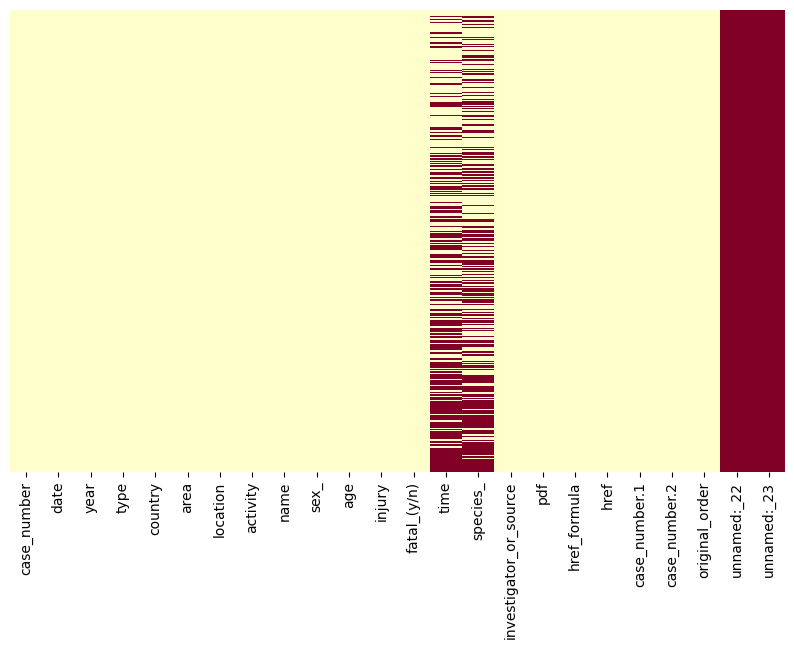

In [98]:
check_nan(ataques)